In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import joblib

In [180]:
df = pd.read_csv('data/data.csv')
df

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22
0,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-28,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-29,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-30,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-31,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-09-01,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91895,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-03,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91896,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-04,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91897,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-05,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91898,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-06,NaN,0.28,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df.columns = df.columns.str.lower()
# set the index to date
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'],inplace=True)
df

,station,name,date,awnd,prcp,snow,snwd,tavg,tmax,tmin,...,wt10,wt11,wt13,wt14,wt15,wt16,wt17,wt18,wt21,wt22
date,,,,,,,,,,,,,,,,,,,,,
2008-08-28,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-28,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-29,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-29,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-30,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-30,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-31,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-31,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-09-01,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-03,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-03,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-04,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-04,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-05,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-05,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91900 entries, 2008-08-28 to 2018-12-07
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  91900 non-null  object        
 1   name     91900 non-null  object        
 2   date     91900 non-null  datetime64[ns]
 3   awnd     15335 non-null  float64       
 4   prcp     91325 non-null  float64       
 5   snow     52798 non-null  float64       
 6   snwd     10805 non-null  float64       
 7   tavg     4487 non-null   float64       
 8   tmax     15336 non-null  float64       
 9   tmin     15354 non-null  float64       
 10  wt01     3966 non-null   float64       
 11  wt02     338 non-null    float64       
 12  wt03     1950 non-null   float64       
 13  wt04     46 non-null     float64       
 14  wt05     252 non-null    float64       
 15  wt06     70 non-null     float64       
 16  wt07     100 non-null    float64       
 17  wt08     1950 

In [183]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
null_pct

station    0.000000
name       0.000000
date       0.000000
awnd       0.833134
prcp       0.006257
snow       0.425484
snwd       0.882427
tavg       0.951175
tmax       0.833123
tmin       0.832927
wt01       0.956844
wt02       0.996322
wt03       0.978781
wt04       0.999499
wt05       0.997258
wt06       0.999238
wt07       0.998912
wt08       0.978781
wt09       0.999793
wt10       0.999978
wt11       0.999869
wt13       0.995343
wt14       0.998575
wt15       0.999967
wt16       0.993580
wt17       0.999978
wt18       0.999630
wt21       0.999978
wt22       0.999956
dtype: float64

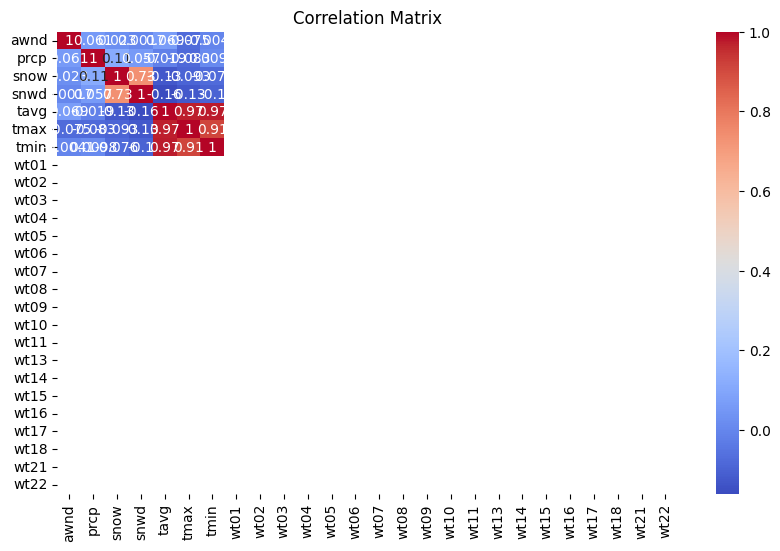

In [184]:
num_cols = df.drop(columns=['station','name','date'])
correlation = num_cols.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [185]:
df.drop(
    columns=['station','name','date','wt01','wt02','wt03','wt04','wt05','wt06','wt07','wt08','wt09','wt10','wt11','wt13','wt14','wt15','wt16','wt17','wt18','wt21','wt22'],
            inplace=True
)
df

,awnd,prcp,snow,snwd,tavg,tmax,tmin
date,,,,,,,
2008-08-28,NaN,0.00,0.0,NaN,NaN,NaN,NaN
2008-08-29,NaN,0.00,0.0,NaN,NaN,NaN,NaN
2008-08-30,NaN,0.00,0.0,NaN,NaN,NaN,NaN
2008-08-31,NaN,0.00,0.0,NaN,NaN,NaN,NaN
2008-09-01,NaN,0.00,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2018-12-03,NaN,0.00,0.0,NaN,NaN,NaN,NaN
2018-12-04,NaN,0.00,0.0,NaN,NaN,NaN,NaN
2018-12-05,NaN,0.00,0.0,NaN,NaN,NaN,NaN


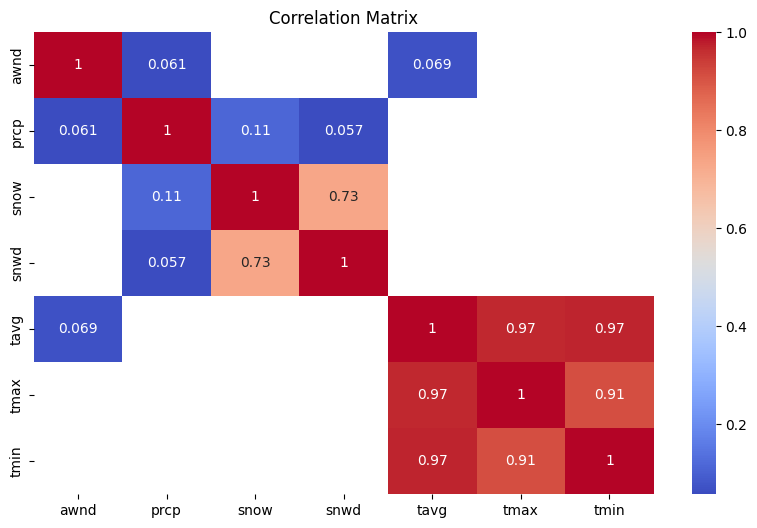

In [186]:
correlation = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation[correlation > .05],annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [157]:
df = df.copy()

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91900 entries, 0 to 91899
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   awnd    15335 non-null  float64
 1   prcp    91325 non-null  float64
 2   snow    52798 non-null  float64
 3   snwd    10805 non-null  float64
 4   tavg    4487 non-null   float64
 5   tmax    15336 non-null  float64
 6   tmin    15354 non-null  float64
dtypes: float64(7)
memory usage: 4.9 MB


In [187]:
null_pct = df.apply(pd.isnull).sum() / df.shape[0]
null_pct

awnd    0.833134
prcp    0.006257
snow    0.425484
snwd    0.882427
tavg    0.951175
tmax    0.833123
tmin    0.832927
dtype: float64

In [188]:
df.drop(df.columns[null_pct > .9],axis=1,inplace=True)
df

,awnd,prcp,snow,snwd,tmax,tmin
date,,,,,,
2008-08-28,NaN,0.00,0.0,NaN,NaN,NaN
2008-08-29,NaN,0.00,0.0,NaN,NaN,NaN
2008-08-30,NaN,0.00,0.0,NaN,NaN,NaN
2008-08-31,NaN,0.00,0.0,NaN,NaN,NaN
2008-09-01,NaN,0.00,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2018-12-03,NaN,0.00,0.0,NaN,NaN,NaN
2018-12-04,NaN,0.00,0.0,NaN,NaN,NaN
2018-12-05,NaN,0.00,0.0,NaN,NaN,NaN


In [189]:
df.dropna(subset=['tmax','tmin','prcp'],inplace=True)
df[['awnd','snow','snwd']] = df[['awnd','snow','snwd']].ffill().bfill()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15274 entries, 2022-05-01 to 2025-07-11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   awnd    15274 non-null  float64
 1   prcp    15274 non-null  float64
 2   snow    15274 non-null  float64
 3   snwd    15274 non-null  float64
 4   tmax    15274 non-null  float64
 5   tmin    15274 non-null  float64
dtypes: float64(6)
memory usage: 835.3 KB


In [162]:
df.dtypes

awnd    float64
prcp    float64
snow    float64
snwd    float64
tmax    float64
tmin    float64
dtype: object

In [190]:
df['target'] = df.shift(-1)['tmax']
df

,awnd,prcp,snow,snwd,tmax,tmin,target
date,,,,,,,
2022-05-01,5.14,0.00,0.0,0.0,84.0,51.0,85.0
2022-05-02,12.53,0.49,0.0,0.0,85.0,65.0,76.0
2022-05-03,6.93,0.56,0.0,0.0,76.0,56.0,86.0
2022-05-04,7.38,0.00,0.0,0.0,86.0,59.0,76.0
2022-05-05,6.26,0.59,0.0,0.0,76.0,57.0,83.0
...,...,...,...,...,...,...,...
2025-07-07,5.82,0.00,0.0,0.0,90.0,72.0,96.0
2025-07-08,6.04,0.39,0.0,0.0,96.0,70.0,94.0
2025-07-09,5.37,0.56,0.0,0.0,94.0,70.0,94.0


In [191]:
df = df.ffill()
df

,awnd,prcp,snow,snwd,tmax,tmin,target
date,,,,,,,
2022-05-01,5.14,0.00,0.0,0.0,84.0,51.0,85.0
2022-05-02,12.53,0.49,0.0,0.0,85.0,65.0,76.0
2022-05-03,6.93,0.56,0.0,0.0,76.0,56.0,86.0
2022-05-04,7.38,0.00,0.0,0.0,86.0,59.0,76.0
2022-05-05,6.26,0.59,0.0,0.0,76.0,57.0,83.0
...,...,...,...,...,...,...,...
2025-07-07,5.82,0.00,0.0,0.0,90.0,72.0,96.0
2025-07-08,6.04,0.39,0.0,0.0,96.0,70.0,94.0
2025-07-09,5.37,0.56,0.0,0.0,94.0,70.0,94.0


In [192]:
 r = Ridge(alpha=.1)

In [193]:
predictors = df.columns[~df.columns.isin(['target','date'])]
predictors

Index(['awnd', 'prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [194]:
def backtest(df,model,predictors, start=2500, step=90):
    all_predictions = []
    for i in range(start,df.shape[0],step):
        train = df.iloc[:i,:]
        test = df.iloc[i:(i+step),:]
        model.fit(train[predictors],train['target'])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds,index=test.index)
        combined = pd.concat([test['target'],preds],axis=1)
        combined.columns = ['actual','predicted']
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [195]:
predictions = backtest(df,r,predictors)
predictions

,actual,predicted
date,,
2011-06-14,99.0,96.402213
2011-06-15,101.0,96.540503
2011-06-16,103.0,95.891944
2011-06-17,103.0,96.037199
2011-06-18,103.0,96.270703
...,...,...
2025-07-07,96.0,91.541129
2025-07-08,94.0,93.696668
2025-07-09,94.0,92.539879


In [196]:
mean_absolute_error(predictions['actual'],predictions['predicted'])

5.090887125681964

In [197]:
def pct_diff(old,new):
    return (new - old) / old

def compute_rolling(df,horizon,col):
    label = f"rolling_{horizon}_{col}"
    df[label] = df[col].rolling(horizon).mean()
    df[f"{label}_pct"] = pct_diff(df[label],df[col])
    return df
rolling_horizon = [3,14]
for horizon in rolling_horizon:
    for col in ['tmax','tmin','prcp']:
        df = compute_rolling(df,horizon,col)

In [198]:
df

,awnd,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
date,,,,,,,,,,,,,,,,,,,
2022-05-01,5.14,0.00,0.0,0.0,84.0,51.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02,12.53,0.49,0.0,0.0,85.0,65.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,6.93,0.56,0.0,0.0,76.0,56.0,86.0,81.666667,-0.069388,57.333333,-0.023256,0.350000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,7.38,0.00,0.0,0.0,86.0,59.0,76.0,82.333333,0.044534,60.000000,-0.016667,0.350000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-05,6.26,0.59,0.0,0.0,76.0,57.0,83.0,79.333333,-0.042017,57.333333,-0.005814,0.383333,0.539130,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,5.82,0.00,0.0,0.0,90.0,72.0,96.0,90.666667,-0.007353,72.333333,-0.004608,0.000000,NaN,92.642857,-0.028527,73.285714,-0.017544,0.012143,-1.00
2025-07-08,6.04,0.39,0.0,0.0,96.0,70.0,94.0,92.000000,0.043478,71.666667,-0.023256,0.130000,2.000000,93.357143,0.028309,73.214286,-0.043902,0.040000,8.75
2025-07-09,5.37,0.56,0.0,0.0,94.0,70.0,94.0,93.333333,0.007143,70.666667,-0.009434,0.316667,0.768421,93.285714,0.007657,72.857143,-0.039216,0.080000,6.00


In [199]:
df = df.iloc[14:,:]
df = df.fillna(0)

In [200]:
def expand_mean(df):
    return df.expanding().mean()

for col in ['tmax','tmin','prcp']:
    df[f"month_avg_{col}"] = df[col].groupby(df.index.month,group_keys=False).transform(expand_mean)
    df[f"day_avg_{col}"] = df[col].groupby(df.index.day_of_year,group_keys=False).transform(expand_mean)

In [201]:
df

,awnd,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
date,,,,,,,,,,,,,,,,,,,,,
2022-05-15,7.61,0.00,0.0,0.0,93.0,67.0,90.0,92.000000,0.010870,65.333333,...,64.928571,0.031903,0.117143,-1.00,93.000000,93.000000,67.000000,67.000000,0.000000,0.000000
2022-05-16,4.70,0.00,0.0,0.0,90.0,65.0,93.0,91.666667,-0.018182,65.333333,...,64.928571,0.001100,0.082143,-1.00,91.500000,90.000000,66.000000,65.000000,0.000000,0.000000
2022-05-17,8.05,0.00,0.0,0.0,93.0,70.0,95.0,92.000000,0.010870,67.333333,...,65.928571,0.061755,0.042143,-1.00,92.000000,93.000000,67.333333,70.000000,0.000000,0.000000
2022-05-18,10.51,0.00,0.0,0.0,95.0,71.0,92.0,92.666667,0.025180,68.666667,...,66.785714,0.063102,0.042143,-1.00,92.750000,95.000000,68.250000,71.000000,0.000000,0.000000
2022-05-19,14.32,0.00,0.0,0.0,92.0,71.0,93.0,93.333333,-0.014286,70.666667,...,67.785714,0.047418,0.000000,0.00,92.600000,92.000000,68.800000,71.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,5.82,0.00,0.0,0.0,90.0,72.0,96.0,90.666667,-0.007353,72.333333,...,73.285714,-0.017544,0.012143,-1.00,96.638009,95.695652,76.647059,75.391304,0.050053,0.062391
2025-07-08,6.04,0.39,0.0,0.0,96.0,70.0,94.0,92.000000,0.043478,71.666667,...,73.214286,-0.043902,0.040000,8.75,96.637528,96.782609,76.642050,76.739130,0.050309,0.135652
2025-07-09,5.37,0.56,0.0,0.0,94.0,70.0,94.0,93.333333,0.007143,70.666667,...,72.857143,-0.039216,0.080000,6.00,96.635542,94.652174,76.637048,76.260870,0.050693,0.085870


In [202]:
predictors = df.columns[~df.columns.isin(['target'])]
predictions = backtest(df,r,predictors)
mean_absolute_error(predictions['actual'],predictions['predicted'])

4.789216097471492

In [203]:
predictions['diff'] = abs(predictions['actual'] - predictions['predicted'])
sort = predictions.sort_values('diff',ascending=False)
sort

,actual,predicted,diff
date,,,
2018-01-21,99.0,62.436942,36.563058
2024-01-13,23.0,58.033346,35.033346
2024-01-13,24.0,58.209341,34.209341
2016-12-17,29.0,62.254753,33.254753
2023-01-28,31.0,64.254382,33.254382
...,...,...,...
2012-12-03,73.0,72.998950,0.001050
2021-11-03,59.0,58.999244,0.000756
2025-06-19,92.0,91.999270,0.000730


In [204]:
predictions['diff'].round().value_counts().sort_index()

diff
0.0     1030
1.0     2077
2.0     1735
3.0     1505
4.0     1207
5.0      996
6.0      802
7.0      688
8.0      544
9.0      505
10.0     363
11.0     281
12.0     204
13.0     188
14.0     141
15.0     104
16.0      90
17.0      66
18.0      64
19.0      40
20.0      31
21.0      23
22.0      12
23.0      23
24.0      13
25.0       7
26.0       8
27.0       2
28.0       3
32.0       1
33.0       4
34.0       1
35.0       1
37.0       1
Name: count, dtype: int64

In [205]:
joblib.dump(r,'ridge_model.joblib')

['ridge_model.joblib']

In [206]:
df.to_csv('weather_training_data.csv',index=False)